                                             SALES PREDICTION USING PYTHON

Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [206]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.model_selection import train_test_split

In [207]:
warnings.filterwarnings('ignore')

In [208]:
# Import CSV File

df = pd.read_csv(r'D:\CodSoft\Task4_Car_Purchase\car_purchasing.csv', encoding = 'latin-1')

In [209]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# 1. Understanding of data

In [210]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In this dataset, target column is 'car purchase amount'

In [211]:
# Shape of the dataset

df.shape

(500, 9)

Total number of rows: 500

Total number of columns: 9

In [212]:
# Columns Information

df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

1. customer name: Name of the customer

    
2. customer e-mail: Email id of the customer
    

3. country: Customer belongs to which country
    

4. gender: Gender of the customer (0: Female, 1: Male)
    

5. age: Age of the customer
    

6. annual salary: Customer's annual salary
    

7. credit card debt: Customer's credit card debt
    

8. net worth: Customer's net worth
    

9. car purchase amount: Overall amount that consumers would spend to purchase car

In [213]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Analysis:
    
    1. Minimum age: 20
       Maximum age: 70
       Average age: 46
        
    2. Minimum annual salary: 20000
       Maximum annual salary: 100000
       Average annual salary: 62127.239608
        
    3. Minimum credit card debt: 100
       Maximum credit card debt: 20000
       Average credit card debt: 9607.645049
        
    4. Minimum net worth: 20000
       Maximum net worth: 1000000
       Average net worth: 431475.713625
        
    5. Minimum purchase amount: 9000
       Maximum purchase amount: 80000
       Average purchase amount: 44209.799218

In [214]:
df.describe(include = 'object')

,customer name,customer e-mail,country
count,500,500,500
unique,498,500,211
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel
freq,2,1,6


Analysis:
    
    1. We have 498 unique customer names.
    2. We have data of 211 countries.

# 2. Data Cleaning

In [215]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

# Rename column names

In [216]:
df.rename(columns = {
    'customer name': 'name',
    'customer e-mail': 'email_id',
    'annual Salary': 'salary',
    'credit card debt': 'debt',
    'net worth': 'net_worth',
    'car purchase amount': 'price'
}, inplace = True)

In [217]:
df.head(4)

,name,email_id,country,gender,age,salary,debt,net_worth,price
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313


# Check for null values

In [218]:
df.isnull().sum()

name         0
email_id     0
country      0
gender       0
age          0
salary       0
debt         0
net_worth    0
price        0
dtype: int64

We do not have null values in our dataset.

# Check for duplicate rows

In [219]:
df.duplicated().sum()

0

No duplicate rows in the dataset.

# Check for datatypes

In [220]:
df.dtypes

name          object
email_id      object
country       object
gender         int64
age          float64
salary       float64
debt         float64
net_worth    float64
price        float64
dtype: object

* Since, the age column is in float. We will covert it to integer.

In [221]:
df['age'] = df['age'].astype('int')

In [222]:
df.head()

,name,email_id,country,gender,age,salary,debt,net_worth,price
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248


# Remove irrelevant columns

'name', 'email_id' and 'country' are the irrelevant columns. These columns will  not help in modeling . So, we will delete these columns.

In [223]:
df.drop(['name', 'email_id', 'country'], axis = 1, inplace = True)

In [224]:
df.head()

,gender,age,salary,debt,net_worth,price
0,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


# 3. Exploratory Data Analysis

# * Univariate Analysis

# Price

<Axes: xlabel='price', ylabel='Count'>

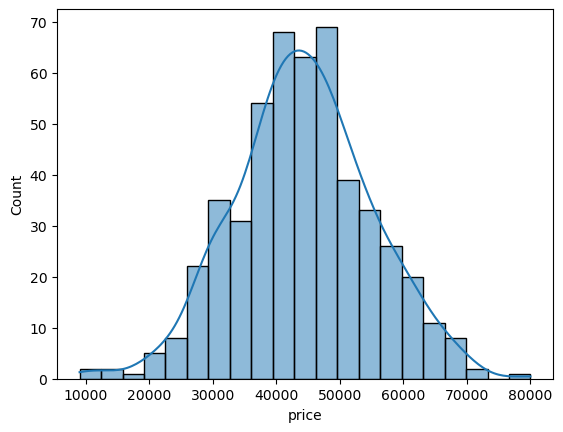

In [225]:
sns.histplot(data = df, x = 'price', kde = True)

Analysis: 
    
    1. Price column follows the normal distribution.
    
    2. Maximum price lies between 40,000 to 50,000.

# Gender

([<matplotlib.axis.XTick at 0x27fe2563910>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

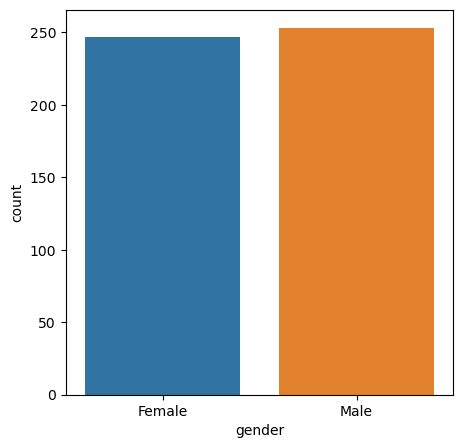

In [226]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'gender', data = df)
plt.xticks([0,1], ['Female', 'Male'])

In [227]:
df['gender'].value_counts()

gender
1    253
0    247
Name: count, dtype: int64

Analysis:
    
    1. The dataset have nearly equal amount of data from men and women.

# Age

<Axes: xlabel='age', ylabel='count'>

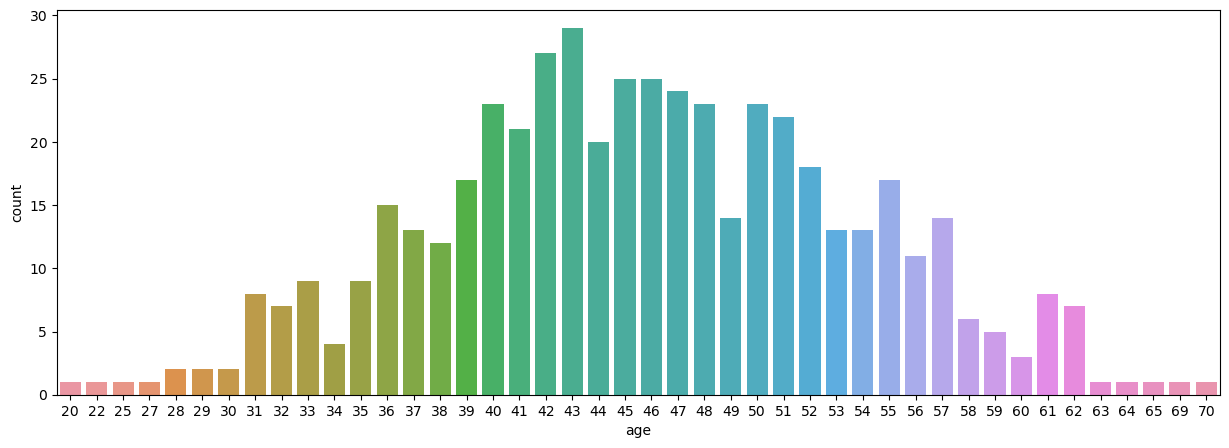

In [228]:
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'age')

Analysis:
    
    1. We have data on people ages 20 to 70.
    
    2. Most of the peope are from age 43.

# Salary

<Axes: xlabel='salary', ylabel='Count'>

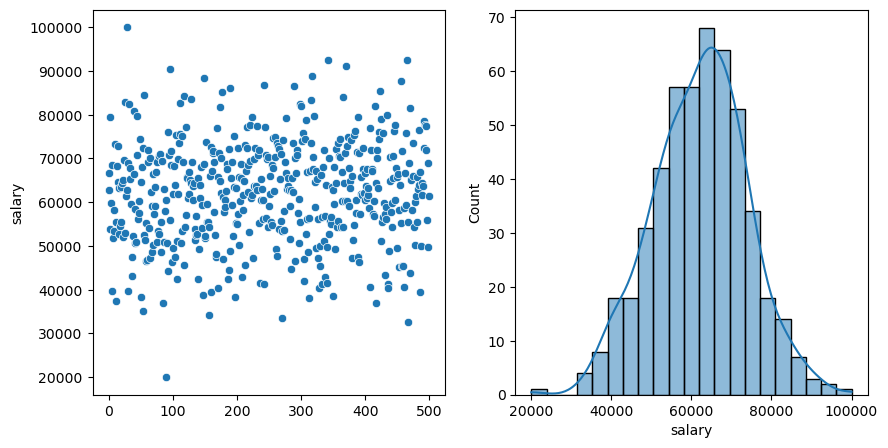

In [229]:
figure, axes = plt.subplots(1, 2, figsize = (10,5)) 

sns.scatterplot(df['salary'], ax = axes[0])
sns.histplot(data = df, x ='salary', kde = True, ax = axes[1])

Analysis:

    1. The data of salary column is almost normally distributed.
    
    2. A salary of roughly 70000 is what most individuals make.
    
    3. Minimum salary is 20000.
    
    4. Maximum salary is 100000.

# Debt

<Axes: xlabel='debt', ylabel='Count'>

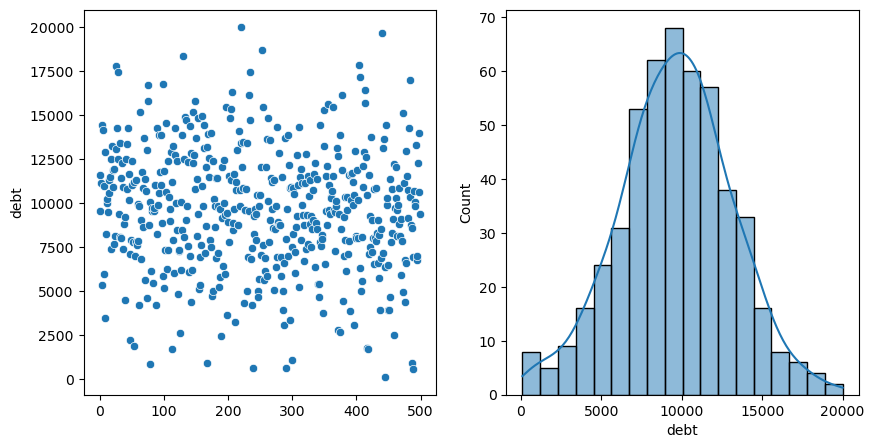

In [230]:
figure, axes = plt.subplots(1, 2, figsize = (10,5)) 

sns.scatterplot(df['debt'], ax = axes[0])
sns.histplot(data = df, x ='debt', kde = True, ax = axes[1])

 Analysis:
        
        1. The data of debt column is normally distributed.
        
        2. The majority of people owe approximately 10,000 in debt. 
        
        3. In this data, the minimum debt is 100.
        
        4. In this data, the maximum debt is 20,000.

# Net Worth

<Axes: xlabel='net_worth', ylabel='Count'>

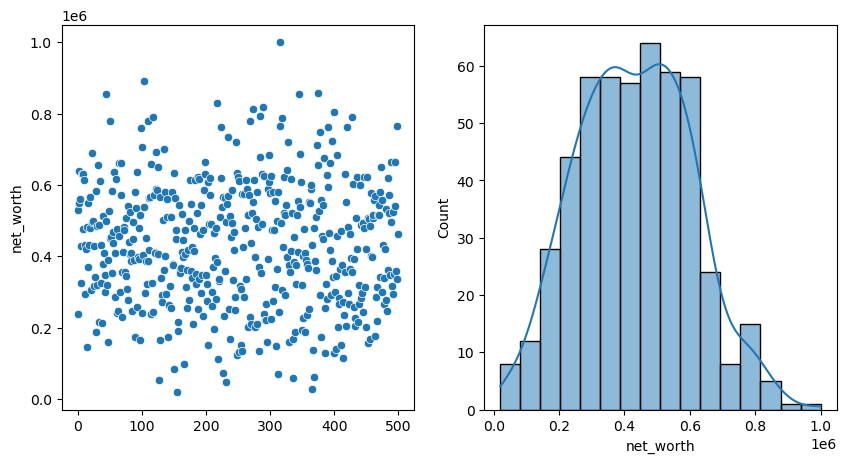

In [231]:
figure, axes = plt.subplots(1, 2, figsize = (10,5)) 

sns.scatterplot(df['net_worth'], ax = axes[0])
sns.histplot(data = df, x ='net_worth', kde = True, ax = axes[1])

Analysis:
    
    The majority of people fall into the 0.2 to 0.7 net worth range.

# * Multivariate Analysis

# Price, Debt and Gender

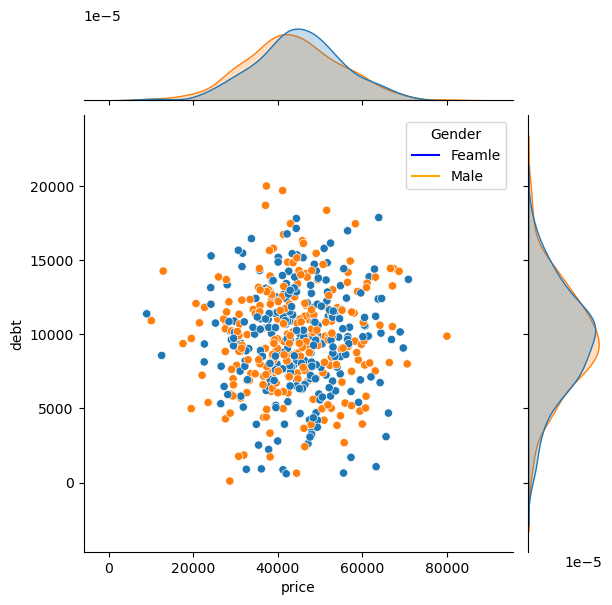

In [232]:
sns.jointplot(data = df, x = 'price', y = 'debt', hue = 'gender')
legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legend_handles, ['Feamle', 'Male'], title = 'Gender')

Analysis:
    
    1. Debt is higher among men than among women.
    
    2. The cost of buying a car is higher for women than for men.
    
    3. The average cost of purchasing a car is between 30,000 and 60,000 if the debt of the individual is between 5,000 and              15,000.

# Gender, Price and Salary

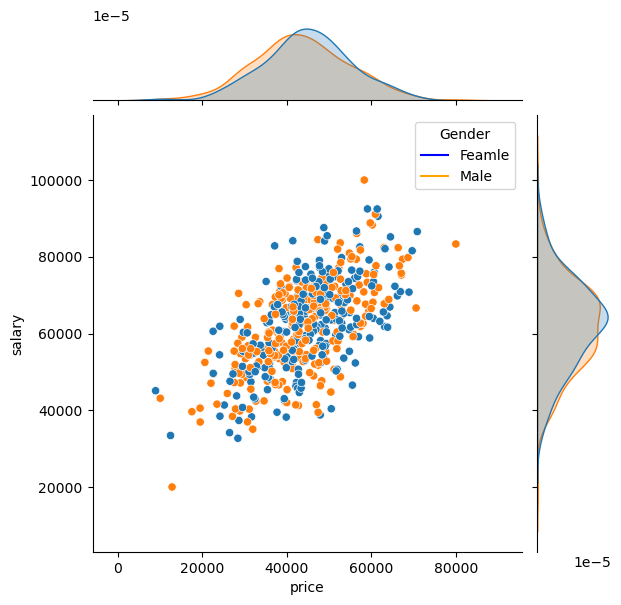

In [233]:
sns.jointplot(data = df, x = 'price', y = 'salary', hue = 'gender')
legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legend_handles, ['Feamle', 'Male'], title = 'Gender')

Analysis:
    
    1. Men make higher salaries than women do.
    
    2. Salary appears to be correlated with an individual's purchase price.
    
    3. A person is more likely to pay a high price for a car if they make a respectable living.

# Gender, Net Worth and Debt

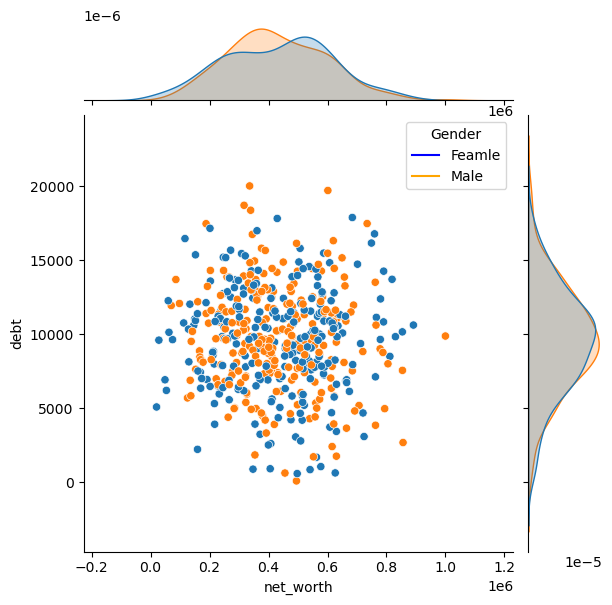

In [234]:
sns.jointplot(data = df, x = 'net_worth', y = 'debt', hue = 'gender')
legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legend_handles, ['Feamle', 'Male'], title = 'Gender')

Analysis:
    
     Women have a marginally higher net worth than men.

# Gender, Net Worth and Price

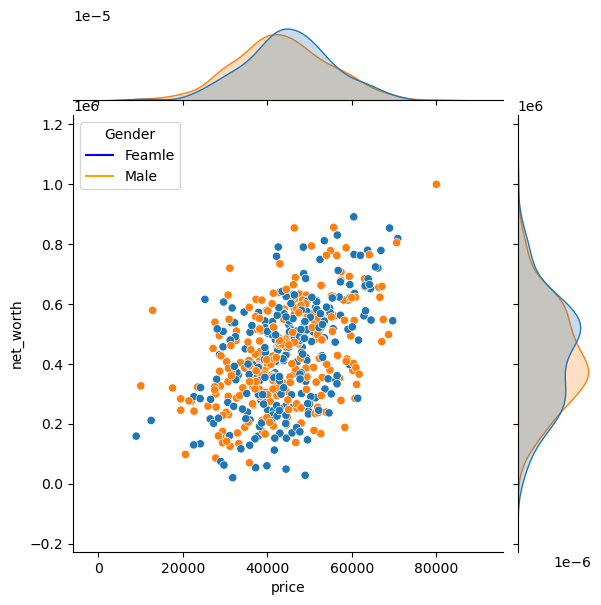

In [235]:
sns.jointplot(data = df, x = 'price', y = 'net_worth', hue = 'gender')
legend_handles = [plt.Line2D([0], [0], color = 'blue'), plt.Line2D([0], [0], color = 'orange')]
plt.legend(legend_handles, ['Feamle', 'Male'], title = 'Gender')

Analysis:
    
     1. Net Worth appears to be correlated with an individual's purchase price.
    
     2. If someone has a large net worth, they are more likely to spend a high price on a car.

# 4. Data Preprocessing

In data preprocessing, we will perform:
    
    1. Check for outliers
    2. Check correlation
    3. Apply standard scaling
    4. Split data in train and test

# Check Outliers:

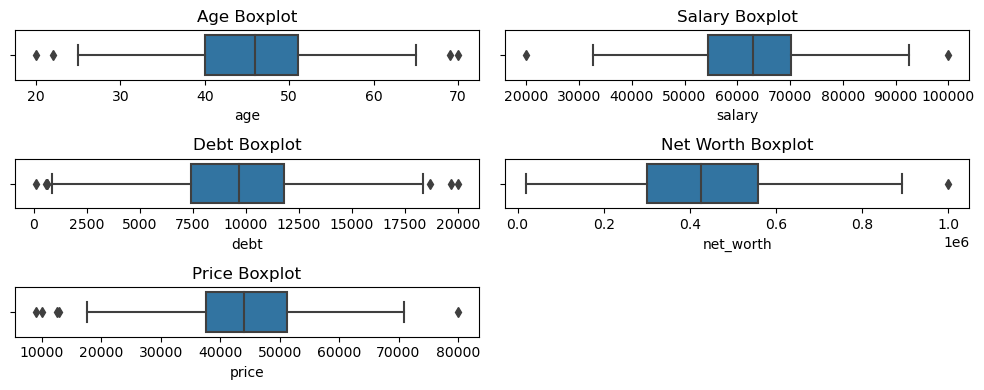

In [236]:
fig ,ax = plt.subplots(3,2,figsize=(10,4))
sns.boxplot(df, x = 'age', ax = ax[0,0])
sns.boxplot(df, x = 'salary', ax = ax[0,1])
sns.boxplot(df, x = 'debt', ax = ax[1,0])
sns.boxplot(df, x = 'net_worth', ax = ax[1,1])
sns.boxplot(df, x = 'price', ax = ax[2,0])
fig.delaxes(ax = ax[2, 1])
ax[0,0].set_title('Age Boxplot')
ax[0,1].set_title('Salary Boxplot')
ax[1,0].set_title('Debt Boxplot')
ax[1,1].set_title('Net Worth Boxplot')
ax[2,0].set_title('Price Boxplot')
plt.tight_layout()
plt.show()

In [237]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [238]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [239]:
for i in df.columns:
    out_remove(df,i)
    df.reset_index(drop=True,inplace = True)

gender ------- outliers not present
age ------- outliers present
salary ------- outliers present
debt ------- outliers present
net_worth ------- outliers present
price ------- outliers present


In [240]:
df.shape

(483, 6)

* It is evident that there were outliers in the age, salary, debt, net worth, and price categories. Thus, we eliminated 
  the outliers.
    
* Total outliers in the dataset = 17

* After removing the outliers, we are left with 483 rows.

# Check Correlation

<Axes: >

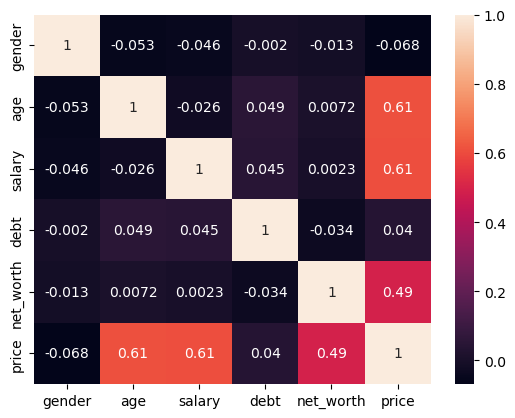

In [241]:
sns.heatmap(df.corr(), annot = True)

There is no such correlation between columns.

# Standard Scaling

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
scale = df.drop('price', axis = 1)

In [244]:
ss = StandardScaler()

In [245]:
scaled_data = ss.fit_transform(scale)

In [246]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [247]:
scaled_df.head(3)

,gender,age,salary,debt,net_worth
0,-0.997932,-0.640277,0.041494,0.616445,-1.121074
1,-0.997932,-0.771651,0.380845,-0.000183,0.574198
2,1.002073,-0.377530,-0.756135,0.480480,1.198247


# Train Test Split

In [248]:
X = scaled_df
y = df['price']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 110)

# 5. Model Buliding

In [250]:
from sklearn.metrics import r2_score, mean_absolute_error, f1_score, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

# Scorecard Function

In [251]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Mean_Squared_Error_Train', 'Mean_Absolute_Error_Train', 'R2_Score_Train', 'Root_Mean_Squared_Error_Train', 'Mean_Squared_Error_Test', 'Mean_Absolute_Error_Test', 'R2_Score_Test', 'Root_Mean_Squared_Error_Test'])

In [252]:
def score_card(d_f, model_name, y_train, y_test, train_pred, test_pred, train_rmse, test_rmse):
    metrics_dict = {
        'Model_name': model_name,
        'Mean_Squared_Error_Train': mean_squared_error(y_train, train_pred), 
        'Mean_Absolute_Error_Train': mean_absolute_error(y_train, train_pred), 
        'R2_Score_Train': r2_score(train_pred, y_train),
        'Root_Mean_Squared_Error_Train': train_rmse,
        'Mean_Squared_Error_Test': mean_squared_error(y_test, test_pred), 
        'Mean_Absolute_Error_Test': mean_absolute_error(y_test, test_pred), 
        'R2_Score_Test': r2_score(test_pred, y_test),
        'Root_Mean_Squared_Error_Test': test_rmse
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

# 1. Linear Regression

In [253]:
from sklearn.linear_model import LinearRegression

In [254]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
ypred_lr =  model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train)

# *RMSE

In [255]:
mse_lr = mean_squared_error(y_test, ypred_lr)
mse_lr_train = mean_squared_error(y_train, ypred_lr_train)
rmse_lr = math.sqrt(mse_lr)
rmse_lr_train = math.sqrt(mse_lr_train)

print(rmse_lr)
print(rmse_lr_train)

254.53019592360954
235.72636755030499


In [256]:
df101 = score_card(df_scorecard, 'Linear Regression', y_train, y_test, ypred_lr_train, ypred_lr, rmse_lr_train, rmse_lr)
df101

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,55566.920358,203.804813,0.999487,235.726368,64785.620637,222.919522,0.999273,254.530196


# 2. Lasso Regression

In [257]:
from sklearn.linear_model import Lasso

In [258]:
ls = Lasso(alpha = 0.01)
model_ls = ls.fit(X_train, y_train)
ypred_ls =  model_ls.predict(X_test)
ypred_ls_train = model_ls.predict(X_train)

# * RMSE

In [259]:
mse_ls = mean_squared_error(y_test, ypred_ls)
mse_ls_train = mean_squared_error(y_train, ypred_ls_train)
rmse_ls = math.sqrt(mse_ls)
rmse_ls_train = math.sqrt(mse_ls_train)

print(rmse_ls)
print(rmse_ls_train)

254.5341050505332
235.7263686451724


In [271]:
df102 = score_card(df101, 'Lasso Regression', y_train, y_test, ypred_ls_train, ypred_ls, rmse_ls_train, rmse_ls)
df102

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,55566.920358,203.804813,0.999487,235.726368,64785.620637,222.919522,0.999273,254.530196
1,Lasso Regression,55566.920875,203.804948,0.999487,235.726369,64787.610634,222.922321,0.999273,254.534105


# 3. Ridge Regression

In [260]:
from sklearn.linear_model import Ridge

In [263]:
rg = Ridge(alpha = 3)
model_rg = rg.fit(X_train, y_train)
ypred_rg =  model_rg.predict(X_test)
ypred_rg_train = model_rg.predict(X_train)

# * RMSE

In [264]:
mse_rg = mean_squared_error(y_test, ypred_rg)
mse_rg_train = mean_squared_error(y_train, ypred_rg_train)
rmse_rg = math.sqrt(mse_rg)
rmse_rg_train = math.sqrt(mse_rg_train)

print(rmse_rg)
print(rmse_rg_train)

281.6440136036638
248.62327710306607


In [272]:
df103 = score_card(df102, 'Ridge Regression', y_train, y_test, ypred_rg_train, ypred_rg, rmse_rg_train, rmse_rg)
df103

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,55566.920358,203.804813,0.999487,235.726368,64785.620637,222.919522,0.999273,254.530196
1,Lasso Regression,55566.920875,203.804948,0.999487,235.726369,64787.610634,222.922321,0.999273,254.534105
2,Ridge Regression,61813.533917,210.046355,0.999420,248.623277,79323.350399,243.157359,0.999096,281.644014


# 4. Decision Tree

In [265]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.tree import DecisionTreeRegressor

In [266]:
htmodel_dt = gscv(DecisionTreeRegressor(), param_grid = {'max_depth': [2,5,10,15,20,25],
                                                       'min_samples_leaf': [1,2,3],
                                                       'min_samples_split': [2,3,4],
                                                       'max_leaf_nodes': [2,6,10,14,18,20],
                                                       'min_impurity_decrease': [0,1,2]}, cv = 5)

In [267]:
htmodel_dt.fit(X, y)
print(htmodel_dt.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 20, 'min_impurity_decrease': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [268]:
model_dt_gscv = DecisionTreeRegressor(max_depth = htmodel_dt.best_params_.get('max_depth'),
         min_samples_leaf = htmodel_dt.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel_dt.best_params_.get('min_samples_split'),
         max_leaf_nodes = htmodel_dt.best_params_.get('max_leaf_nodes'),
         min_impurity_decrease = htmodel_dt.best_params_.get('min_impurity_decrease')).fit(X_train, y_train)

In [269]:
ypred_dt =  model_dt_gscv.predict(X_test)
ypred_dt_train = model_dt_gscv.predict(X_train)

In [270]:
mse_dt = mean_squared_error(y_test, ypred_dt)
mse_dt_train = mean_squared_error(y_train, ypred_dt_train)
rmse_dt = math.sqrt(mse_dt)
rmse_dt_train = math.sqrt(mse_dt_train)

print(rmse_dt)
print(rmse_dt_train)

5118.28129568444
3719.3455932082634


In [308]:
df104 = score_card(df103, 'Decision Tree Regressor', y_train, y_test, ypred_dt_train, ypred_dt, rmse_dt_train, rmse_dt)
df104

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,5.556692e+04,203.804813,0.999487,235.726368,6.478562e+04,222.919522,0.999273,254.530196
1,Lasso Regression,5.556692e+04,203.804948,0.999487,235.726369,6.478761e+04,222.922321,0.999273,254.534105
2,Ridge Regression,6.181353e+04,210.046355,0.999420,248.623277,7.932335e+04,243.157359,0.999096,281.644014
3,Decision Tree Regressor,1.383353e+07,3013.817195,0.853603,3719.345593,2.619680e+07,4162.347904,0.633190,5118.281296


# 5. Random Forest

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [297]:
htmodel_rf = gscv(RandomForestRegressor(random_state = 110), param_grid = {'n_estimators': [50, 80, 100, 150, 200],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       "min_samples_split" : [2,4,6,8,10],
                                                       "bootstrap": [True, False]}, cv = 5)

In [298]:
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}


In [299]:
model_rf_gscv = RandomForestRegressor(n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features'),
                                       min_samples_split = htmodel_rf.best_params_.get('min_samples_split'),
                                       bootstrap = htmodel_rf.best_params_.get('bootstrap')).fit(X_train, y_train)

In [300]:
ypred_rf =  model_rf_gscv.predict(X_test)
ypred_rf_train = model_rf_gscv.predict(X_train)

# * RMSE

In [301]:
mse_rf = mean_squared_error(y_test, ypred_rf)
mse_rf_train = mean_squared_error(y_train, ypred_rf_train)
rmse_rf = math.sqrt(mse_rf)
rmse_rf_train = math.sqrt(mse_rf_train)

print(rmse_rf)
print(rmse_rf_train)

2479.2303426060535
945.7077183583795


In [309]:
df105 = score_card(df104, 'Random Forest Regressor', y_train, y_test, ypred_rf_train, ypred_rf, rmse_rf_train, rmse_rf)
df105

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,5.556692e+04,203.804813,0.999487,235.726368,6.478562e+04,222.919522,0.999273,254.530196
1,Lasso Regression,5.556692e+04,203.804948,0.999487,235.726369,6.478761e+04,222.922321,0.999273,254.534105
2,Ridge Regression,6.181353e+04,210.046355,0.999420,248.623277,7.932335e+04,243.157359,0.999096,281.644014
3,Decision Tree Regressor,1.383353e+07,3013.817195,0.853603,3719.345593,2.619680e+07,4162.347904,0.633190,5118.281296
4,Random Forest Regressor,8.943631e+05,724.988640,0.990765,945.707718,6.146583e+06,1752.460834,0.907279,2479.230343


# 6. Bagging

In [303]:
from sklearn.ensemble import BaggingRegressor

In [304]:
bg = BaggingRegressor(n_estimators = 150, random_state = 110)
model_bg = bg.fit(X_train,y_train)

In [305]:
ypred_bg =  model_bg.predict(X_test)
ypred_bg_train = model_bg.predict(X_train)

# * RMSE

In [306]:
mse_bg = mean_squared_error(y_test, ypred_bg)
mse_bg_train = mean_squared_error(y_train, ypred_bg_train)
rmse_bg = math.sqrt(mse_bg)
rmse_bg_train = math.sqrt(mse_bg_train)

print(rmse_bg)
print(rmse_bg_train)

2426.2063269675423
847.3984251729219


In [310]:
df106 = score_card(df105, 'Bagging Regressor', y_train, y_test, ypred_bg_train, ypred_bg, rmse_bg_train, rmse_bg)
df106

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,5.556692e+04,203.804813,0.999487,235.726368,6.478562e+04,222.919522,0.999273,254.530196
1,Lasso Regression,5.556692e+04,203.804948,0.999487,235.726369,6.478761e+04,222.922321,0.999273,254.534105
2,Ridge Regression,6.181353e+04,210.046355,0.999420,248.623277,7.932335e+04,243.157359,0.999096,281.644014
3,Decision Tree Regressor,1.383353e+07,3013.817195,0.853603,3719.345593,2.619680e+07,4162.347904,0.633190,5118.281296
4,Random Forest Regressor,8.943631e+05,724.988640,0.990765,945.707718,6.146583e+06,1752.460834,0.907279,2479.230343
5,Bagging Regressor,7.180841e+05,619.242658,0.992695,847.398425,5.886477e+06,1721.742240,0.913449,2426.206327


# 7. AdaBoost Regressor

In [311]:
from sklearn.ensemble import AdaBoostRegressor

In [312]:
ab = AdaBoostRegressor(n_estimators = 150, learning_rate = 3, random_state = 102, loss = 'linear')
model_ab = ab.fit(X_train,y_train)

In [313]:
ypred_ab =  model_ab.predict(X_test)
ypred_ab_train = model_ab.predict(X_train)

# * RMSE

In [314]:
mse_ab = mean_squared_error(y_test, ypred_ab)
mse_ab_train = mean_squared_error(y_train, ypred_ab_train)
rmse_ab = math.sqrt(mse_ab)
rmse_ab_train = math.sqrt(mse_ab_train)

print(rmse_ab)
print(rmse_ab_train)

3183.8606496668226
2613.564632090293


In [315]:
df107 = score_card(df106, 'AdaBoost Regressor', y_train, y_test, ypred_ab_train, ypred_ab, rmse_ab_train, rmse_ab)
df107

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,5.556692e+04,203.804813,0.999487,235.726368,6.478562e+04,222.919522,0.999273,254.530196
1,Lasso Regression,5.556692e+04,203.804948,0.999487,235.726369,6.478761e+04,222.922321,0.999273,254.534105
2,Ridge Regression,6.181353e+04,210.046355,0.999420,248.623277,7.932335e+04,243.157359,0.999096,281.644014
3,Decision Tree Regressor,1.383353e+07,3013.817195,0.853603,3719.345593,2.619680e+07,4162.347904,0.633190,5118.281296
4,Random Forest Regressor,8.943631e+05,724.988640,0.990765,945.707718,6.146583e+06,1752.460834,0.907279,2479.230343
5,Bagging Regressor,7.180841e+05,619.242658,0.992695,847.398425,5.886477e+06,1721.742240,0.913449,2426.206327
6,AdaBoost Regressor,6.830720e+06,2119.136698,0.900173,2613.564632,1.013697e+07,2358.859339,0.789964,3183.860650


# 8. XGBoost Regressor

In [316]:
import xgboost

In [317]:
xg = xgboost.XGBRegressor()
model_xg = xg.fit(X_train, y_train)

In [318]:
ypred_xg =  model_xg.predict(X_test)
ypred_xg_train = model_xg.predict(X_train)

In [319]:
mse_xg = mean_squared_error(y_test, ypred_xg)
mse_xg_train = mean_squared_error(y_train, ypred_xg_train)
rmse_xg = math.sqrt(mse_xg)
rmse_xg_train = math.sqrt(mse_xg_train)

print(rmse_xg)
print(rmse_xg_train)

2309.115179874625
22.208136221247646


In [320]:
df108 = score_card(df107, 'XGBoost Regressor', y_train, y_test, ypred_xg_train, ypred_ab, rmse_xg_train, rmse_xg)
df108

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,5.556692e+04,203.804813,0.999487,235.726368,6.478562e+04,222.919522,0.999273,254.530196
1,Lasso Regression,5.556692e+04,203.804948,0.999487,235.726369,6.478761e+04,222.922321,0.999273,254.534105
2,Ridge Regression,6.181353e+04,210.046355,0.999420,248.623277,7.932335e+04,243.157359,0.999096,281.644014
3,Decision Tree Regressor,1.383353e+07,3013.817195,0.853603,3719.345593,2.619680e+07,4162.347904,0.633190,5118.281296
4,Random Forest Regressor,8.943631e+05,724.988640,0.990765,945.707718,6.146583e+06,1752.460834,0.907279,2479.230343
5,Bagging Regressor,7.180841e+05,619.242658,0.992695,847.398425,5.886477e+06,1721.742240,0.913449,2426.206327
6,AdaBoost Regressor,6.830720e+06,2119.136698,0.900173,2613.564632,1.013697e+07,2358.859339,0.789964,3183.860650
7,XGBoost Regressor,4.932013e+02,15.535741,0.999995,22.208136,1.013697e+07,2358.859339,0.789964,2309.115180


# Check the results of trained model

We will check with Ridge Regression Model, because of its good R2 score on both train and test data.

In [326]:
df

,gender,age,salary,debt,net_worth,price
0,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
478,0,41,71942.40291,6995.902524,541670.1016,48901.44342
479,1,37,56039.49793,12301.456790,360419.0988,31491.41457
480,1,53,68888.77805,10611.606860,764531.3203,64147.28888
481,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [327]:
# Give input as an array
array = np.array([0, 41, 71942.40291, 6995.902524, 541670.1016])

# Perform standard sclaer
scaled = ss.transform(array.reshape(1,-1))

# Convert an array to dataframe
sc_df = pd.DataFrame(scaled.reshape(1,5), columns = scale.columns)
sc_df

# Prediction
ypred = model_rg.predict(sc_df)

print('Predicted price will be {}'.format(ypred))

Predicted price will be [48917.72139475]


# Conclusion:

Based on the analysis, the Ridge Regression model has proven to be highly accurate in predicting how much customers are likely to spend on vehicles. With an almost perfect accuracy rate of 99.94% on the training data and 99.91% on the test data, we can trust this model to help us plan sales strategies and make informed business decisions.